In [15]:
import pandas as pd
df1 = pd.read_csv(r'C:\Users\Chintu\Downloads\contentDataRegion.csv.zip')
df1.head()

,dataId,region
0,102795,India
1,102796,United States
2,102797,United States
3,102798,United States
4,102799,United Kingdom


In [42]:
df2 = pd.read_csv(r'C:\Users\Chintu\Downloads\contentDataPrime.csv.zip')
df2.head()

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re..."
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n
3,102798,movie,Don't Look,71,2018,-1,349,2.8,-1,NaN,"In the tradition of classic horror movies, ""Do..."
4,102799,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...


In [7]:
df3 = pd.read_csv(r'C:\Users\Chintu\Downloads\contentDataGenre.csv.zip')
df3.head()

,dataId,genre
0,102795,Drama
1,102796,Documentary
2,102796,Comedy
3,102797,Documentary
4,102797,Horror


# Data Cleaning

In [41]:
#duplicates in df1
df1_dup = df1.duplicated('dataId',keep = False)
df1_dup.value_counts()

False    101604
dtype: int64

In [40]:
#remove duplicates
df1 = df1.drop_duplicates(subset='dataId')
df1.shape

(101604, 2)

In [39]:
#duplicates in df2
df2_dup = df2.duplicated('dataId',keep=False)
df2_dup.value_counts()

False    101604
dtype: int64

In [38]:
#remove duplicates in df2
df2 = df2.drop_duplicates(subset='dataId')
df2.shape

(101604, 8)

In [37]:
#duplicates in df3
df3_dup = df1.duplicated('dataId',keep = False)
df3_dup.value_counts()

False    84665
True     43267
dtype: int64

In [36]:
#remove duplicates in df3
df3 = df3.drop_duplicates(subset='dataId')
df3.shape

(101604, 2)

In [53]:
#check null values
df2.isna().sum()

dataId         0
contentType    0
title          0
length         0
releaseYear    0
votes          0
rating         0
dtype: int64

In [52]:
#remove unused columns
df2 = df2.drop(columns=['endYear','certificate','gross'],axis=1)

In [54]:
df2.head()

,dataId,contentType,title,length,releaseYear,votes,rating
0,102795,movie,Ratha Kanneer,154,1954,349,8.5
1,102796,movie,All Star Comedy Jam,89,-1,349,7.5
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,349,2.9
3,102798,movie,Don't Look,71,2018,349,2.8
4,102799,movie,The Escape from Auschwitz,80,2020,349,1.7


In [59]:
df2_dup = df2.duplicated('dataId',keep=False)
df2 = df2.drop_duplicates(subset='dataId')
df2.shape

(101604, 7)

# Merging DataFrames

In [61]:
df_merge = pd.merge(df2,df1,on='dataId')
df_merge

,dataId,contentType,title,length,releaseYear,votes,rating,region
0,102795,movie,Ratha Kanneer,154,1954,349,8.5,India
1,102796,movie,All Star Comedy Jam,89,-1,349,7.5,United States
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,349,2.9,United States
3,102798,movie,Don't Look,71,2018,349,2.8,United States
4,102799,movie,The Escape from Auschwitz,80,2020,349,1.7,United Kingdom
...,...,...,...,...,...,...,...,...
101599,496,tvSeries,Titans,45,2018,104123,7.5,United States
101600,497,tvSeries,The Man in the High Castle,60,2015,103828,7.9,United States
101601,498,tvSeries,Justified,44,2010,103427,8.6,United States
101602,499,tvSeries,Misfits,60,2009,103121,8.2,United Kingdom


In [64]:
df = pd.merge(df_merge,df3,on="dataId")
df.sample(10)

,dataId,contentType,title,length,releaseYear,votes,rating,region,genre
4951,98764,movie,Herman vermoordt mensen,88,-1,390,7.0,Netherlands,Crime
31529,71450,movie,It Came from Hollywood,80,1982,984,5.8,United States,Documentary
37885,65830,movie,Corro da te,113,2022,1267,6.4,Italy,Comedy
39755,63708,movie,Zatoichi Challenged,87,1967,1408,7.5,Japan,Drama
15642,87499,movie,Boom Bust Boom,70,2015,542,7.1,Netherlands,Documentary
70956,31450,tvSeries,Password,-1,2022,363,6.3,United States,Game-Show
39101,64052,movie,The Story of Three Loves,122,1953,1385,6.8,United States,Drama
66149,36497,tvSeries,Go! Go! Cory Carson,11,2020,271,7.8,United States,Animation
58064,45130,movie,Big Legend,89,2018,2914,4.7,United States,Action
66154,36502,movie,G.I. Blues,104,1960,4124,6.1,United States,Comedy


In [65]:
df.describe()

,dataId,releaseYear,votes,rating
count,101604.000000,101604.000000,1.016040e+05,101604.000000
mean,52149.573540,1877.733514,1.132212e+04,6.361964
std,29761.746755,479.017524,6.084955e+04,1.315032
min,0.000000,-1.000000,-1.000000e+00,1.000000
25%,26503.750000,1984.000000,4.550000e+02,5.700000
50%,52491.500000,2007.000000,9.520000e+02,6.500000
75%,77892.250000,2016.000000,3.097000e+03,7.300000
max,103293.000000,2023.000000,2.715939e+06,10.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101604 entries, 0 to 101603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101604 non-null  int64  
 1   contentType  101604 non-null  object 
 2   title        101604 non-null  object 
 3   length       101604 non-null  object 
 4   releaseYear  101604 non-null  int64  
 5   votes        101604 non-null  int64  
 6   rating       101604 non-null  float64
 7   region       101604 non-null  object 
 8   genre        101604 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ MB


# Exploratory Data Analysis

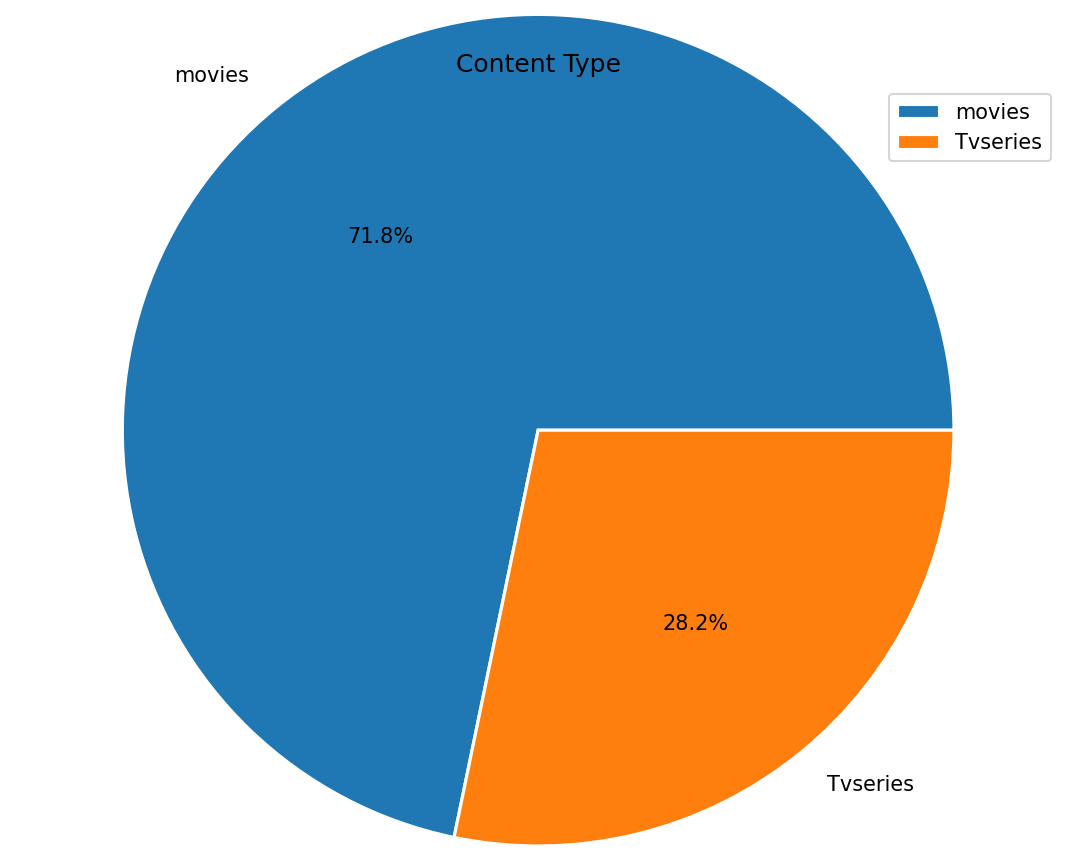

In [113]:
#pie chart of movies vs tvseries
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline
g = df.groupby('contentType',as_index=False)['dataId'].count()
f = np.array(g.dataId)
new_labels = ['movies','Tvseries']
plt.figure(figsize=(9,6),dpi=150)
plt.axis('equal')
plt.pie(f,labels=new_labels,radius=1.5,autopct="%0.1f%%",wedgeprops={'linewidth':1.5,'edgecolor':'white'})
plt.legend(labels=new_labels)
plt.title("Content Type")
plt.show()

In [411]:
df.sample(10)

,dataId,contentType,title,length,releaseYear,votes,rating,region,genre
73236,29809,tvSeries,So Graham Norton,50.0,1998,407,7.5,United Kingdom,Comedy
33249,70176,movie,The Ballad of Josie,102.0,1967,1041,5.7,United States,Comedy
55676,47693,tvSeries,Love Live! Superstar!!,-1.0,2021,162,7.2,Japan,Animation
85112,17196,movie,Animal Factory,94.0,2000,14051,6.6,United States,Crime
100953,851,tvSeries,Paranormal,45.0,2020,72969,8.0,Egypt,Drama
81274,21172,movie,Karakomik Filmler: Kaçamak,60.0,2019,9936,5.5,Turkey,Adventure
31729,71650,movie,John Lewis: Good Trouble,96.0,2020,974,7.5,United States,Documentary
13171,90018,movie,The Left Ear,120.0,2015,501,5.5,China,Drama
61142,41812,tvSeries,Ah My Buddha!!,24.0,2005,210,5.9,Japan,Animation
50774,52771,tvSeries,The Rector's Wife,203.0,1994,130,6.6,United Kingdom,Drama


C:\Users\Chintu\AppData\Local\Temp\ipykernel_4760\346051759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.length = pd.to_numeric(f.length,errors='coerce')


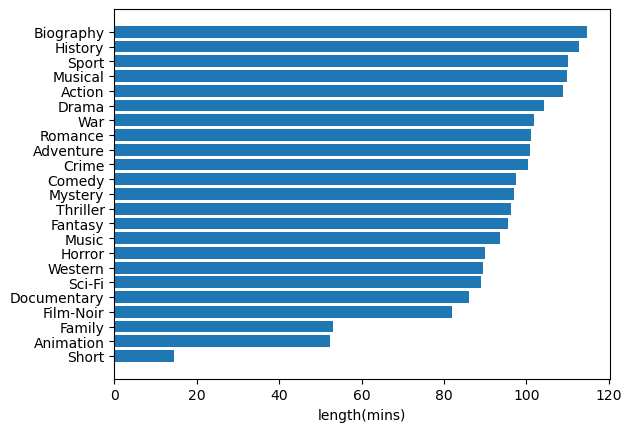

In [301]:
#Average length of movies with respect to genre
g = df.groupby(['contentType'])
f = g.get_group('movie')
f.length = pd.to_numeric(f.length,errors='coerce')
h = f.groupby(['genre'],as_index=False)['length'].mean().sort_values('length',ascending=True)
h = h[h.genre.isin(['n'] )== False]
plt.barh(h.genre,h.length)
plt.xlabel('length(mins)')
plt.show()

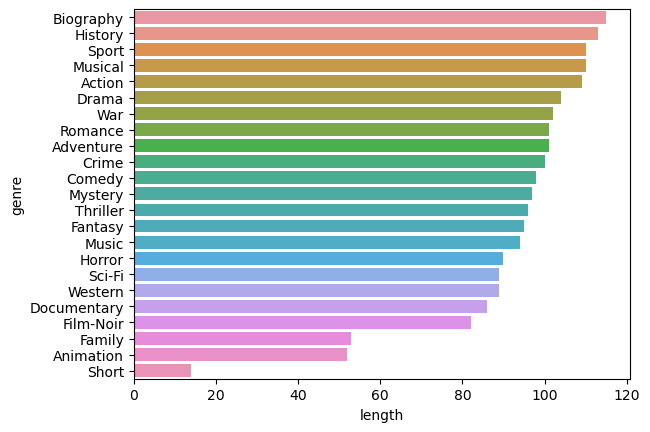

In [325]:
#Average length of movies with respect to genre using seaborn
df.length = pd.to_numeric(df.length,errors='coerce')
df_length = df.groupby(['genre','contentType'],as_index=False)['length'].mean().round().sort_values('length',ascending=False)
df_length
df_length = df_length[(df_length.genre.isin(['n']) == False) & (df_length.length.isin([-1]) == False)]
ax = sn.barplot(x='length',y='genre',data=df_length[df_length.contentType == 'movie'])

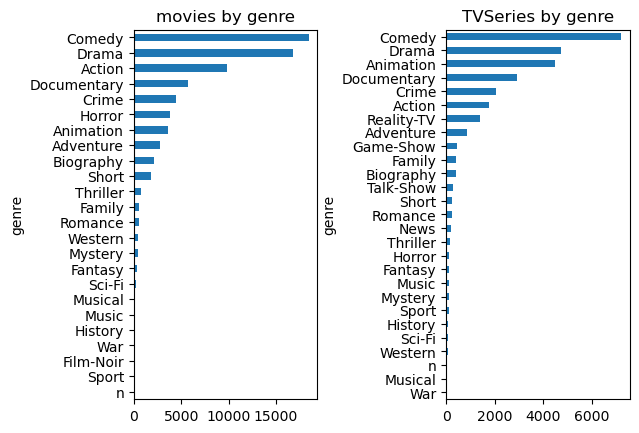

In [544]:
#movies by genre and Tvseries by genre
df_content = df.groupby(['contentType'],as_index=False)
x = df_content.get_group('movie')
x = x.groupby(['genre'])['genre'].count().sort_values(ascending = True)
#x = x[x.genre.isin(['n'])==False]
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.set_title('movies by genre')
x.plot(kind='barh',ax=ax1)
y = df_content.get_group('tvSeries')
y = y.groupby(['genre'])['genre'].count().sort_values(ascending = True)
#plt.subplots(1,1)
ax2.set_title('TVSeries by genre')
y.plot(kind='barh',ax=ax2)
plt.subplots_adjust(wspace=0.7)
#df_content = df.groupby(['genre','contentType'],as_index=False)['contentType']

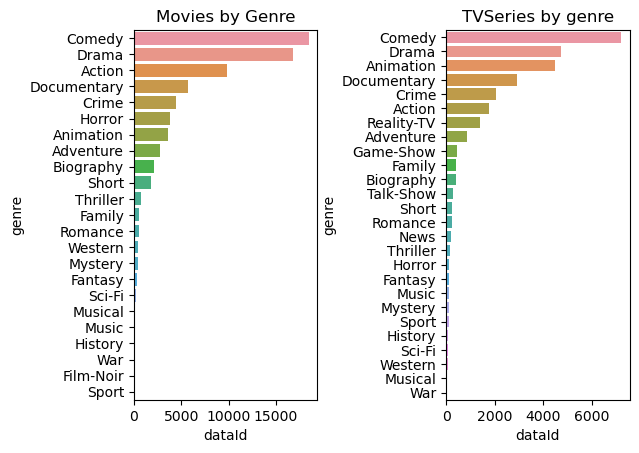

In [406]:
#movies by genre and Tvseries by genre using seaborn
df_genre = df.groupby(['genre','contentType'],as_index=False)['dataId'].count().sort_values('dataId',ascending=False)
df_genre = df_genre[df_genre.genre.isin(['n']) == False]
fig, (ax1,ax2) = plt.subplots(1,2)
#movies by genre
ax1.set_title('Movies by Genre')
ax = sn.barplot(x='dataId',y='genre',data=df_genre[df_genre.contentType == 'movie'],ax=ax1)
#TvSeries by genre
ax = sn.barplot(x='dataId',y='genre',data=df_genre[df_genre.contentType == 'tvSeries'],ax=ax2)
ax2.set_title('TVSeries by genre')

plt.subplots_adjust(wspace=0.7)

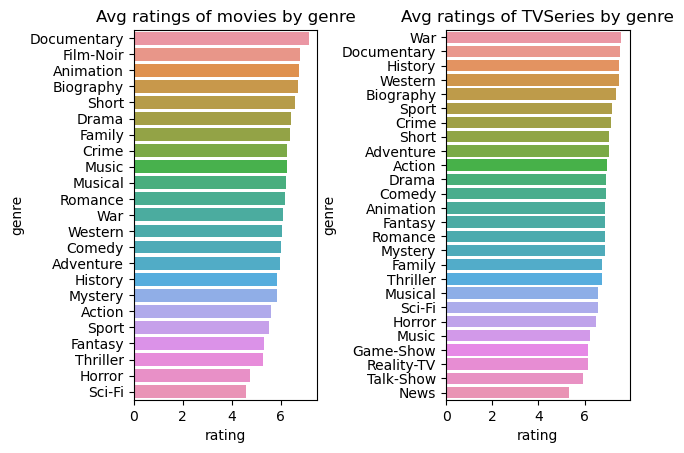

In [419]:
#avg ratings of movies by genre and Tvseries by genre
df_genre = df.groupby(['genre','contentType'],as_index=False)['rating'].mean().sort_values('rating',ascending=False)
fig,(ax1,ax2) = plt.subplots(1,2)
df_genre = df_genre[df_genre.genre.isin(['n'])==False]
#movie
ax1.set_title('Avg ratings of movies by genre')
ax = sn.barplot(x='rating',y='genre',data=df_genre[df_genre.contentType == 'movie'],ax=ax1)
#TVseries
ax2.set_title('Avg ratings of TVSeries by genre')
ax = sn.barplot(x='rating',y='genre',data=df_genre[df_genre.contentType=='tvSeries'],ax=ax2)
plt.subplots_adjust(wspace=0.7)

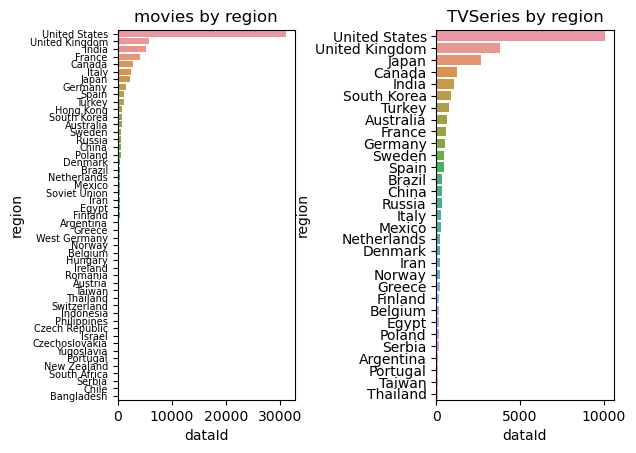

In [452]:
df_region = df.groupby(['region','contentType'],as_index=False)['dataId'].count().sort_values('dataId',ascending=False)
fig,(ax1,ax2) = plt.subplots(1,2)
df_region = df_region[(df_region.dataId >= 100) & (df_region.region.isin(['n']) == False)]
ax1.tick_params(axis='y',labelsize=7)
ax1.set_title('movies by region')
ax = sn.barplot(x='dataId',y='region',data=df_region[df_region.contentType == 'movie'],ax=ax1)
ax2.set_title('TVSeries by region')
ax = sn.barplot(x='dataId',y='region',data=df_region[df_region.contentType == 'tvSeries'],ax=ax2)
plt.subplots_adjust(wspace=0.8)

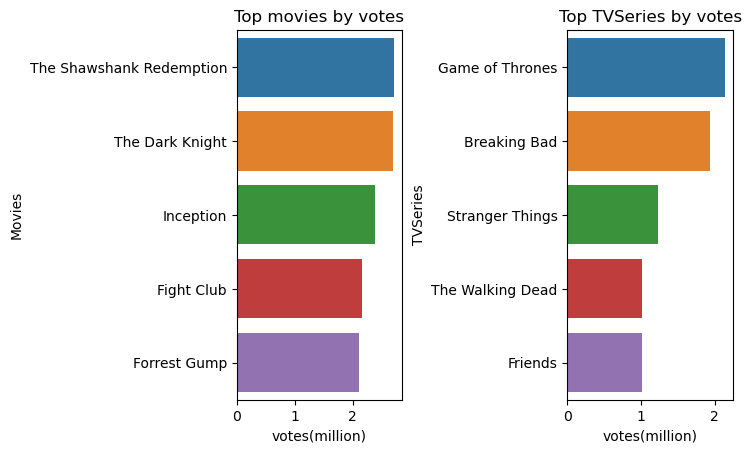

In [483]:
#Top 5 movies and TVSeries by votes
df_votes = df.groupby(['title','contentType'],as_index=False)['votes'].max().sort_values('votes',ascending=False)
df_votes.votes = (df_votes.votes)/1000000
df_votes_movie = df_votes[df_votes.contentType == 'movie']
df_votes_movie = df_votes_movie.head(5)
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.set_title('Top movies by votes')
ax = sn.barplot(x='votes',y='title',data=df_votes_movie,ax=ax1)
ax1.set_xlabel('votes(million)')
ax1.set_ylabel('Movies')
df_votes_tvseries =df_votes[df_votes.contentType == 'tvSeries']
df_votes_tvseries = df_votes_tvseries.head(5)
ax2.set_title('Top TVSeries by votes')
ax = sn.barplot(x='votes',y='title',data=df_votes_tvseries,ax=ax2)
ax2.set_xlabel('votes(million)')
ax2.set_ylabel('TVSeries')
plt.subplots_adjust(wspace=1)

In [484]:
df

,dataId,contentType,title,length,releaseYear,votes,rating,region,genre
0,102795,movie,Ratha Kanneer,154.0,1954,349,8.5,India,Drama
1,102796,movie,All Star Comedy Jam,89.0,-1,349,7.5,United States,Documentary
2,102797,movie,Faces of Death: Fact or Fiction?,54.0,-1,349,2.9,United States,Documentary
3,102798,movie,Don't Look,71.0,2018,349,2.8,United States,Horror
4,102799,movie,The Escape from Auschwitz,80.0,2020,349,1.7,United Kingdom,Drama
...,...,...,...,...,...,...,...,...,...
101599,496,tvSeries,Titans,45.0,2018,104123,7.5,United States,Action
101600,497,tvSeries,The Man in the High Castle,60.0,2015,103828,7.9,United States,Drama
101601,498,tvSeries,Justified,44.0,2010,103427,8.6,United States,Action
101602,499,tvSeries,Misfits,60.0,2009,103121,8.2,United Kingdom,Comedy


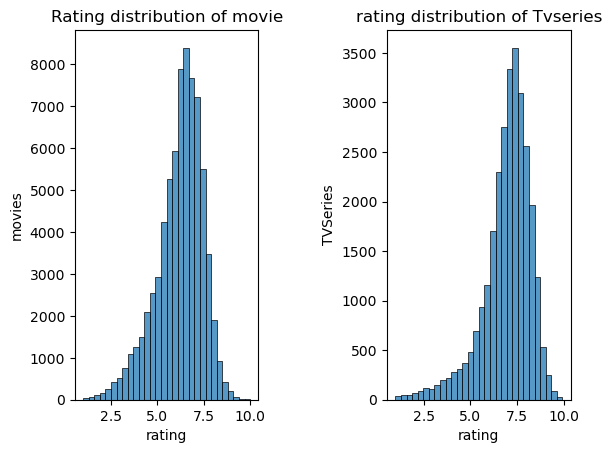

In [511]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Rating distribution of movie')
ax = sn.histplot(x='rating',data=df[df.contentType == 'movie'],bins=30,ax=ax1)
ax1.set_ylabel('movies')
ax2.set_title('rating distribution of Tvseries')
ax=sn.histplot(x='rating',data=df[df.contentType == 'tvSeries'],bins=30,ax=ax2)
ax2.set_ylabel('TVSeries')
plt.subplots_adjust(wspace=0.7)

Text(0.5, 0, 'Release Year')

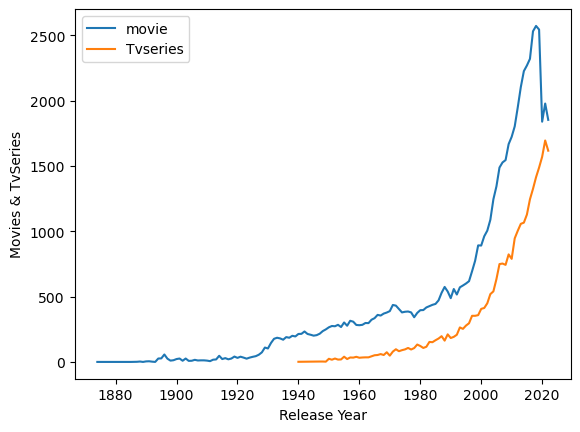

In [530]:
#Trend of movies and TVseries release over the years
df_release = df.groupby(['releaseYear','contentType'],as_index=False)['dataId'].count()
df_release = df_release[df_release.releaseYear.isin([-1,2023]) == False]
df_release_movie = df_release[df_release.contentType == 'movie']
df_release_tv = df_release[df_release.contentType == 'tvSeries']
plt.plot(df_release_movie.releaseYear,df_release_movie.dataId,label='movie')
plt.plot(df_release_tv.releaseYear,df_release_tv.dataId,label='Tvseries')
plt.legend()
plt.ylabel('Movies & TvSeries')
plt.xlabel('Release Year')